In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
data = pd.read_csv('netflix1.csv')
data.head(10)

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"
5,s9,TV Show,The Great British Baking Show,Andy Devonshire,United Kingdom,9/24/2021,2021,TV-14,9 Seasons,"British TV Shows, Reality TV"
6,s10,Movie,The Starling,Theodore Melfi,United States,9/24/2021,2021,PG-13,104 min,"Comedies, Dramas"
7,s939,Movie,Motu Patlu in the Game of Zones,Suhas Kadav,India,5/1/2021,2019,TV-Y7,87 min,"Children & Family Movies, Comedies, Music & Mu..."
8,s13,Movie,Je Suis Karl,Christian Schwochow,Germany,9/23/2021,2021,TV-MA,127 min,"Dramas, International Movies"
9,s940,Movie,Motu Patlu in Wonderland,Suhas Kadav,India,5/1/2021,2013,TV-Y7,76 min,"Children & Family Movies, Music & Musicals"


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB


The dataset is clean from dublicates and null values

# Shows types

In [4]:
types = data['type'].value_counts()
types

Movie      6126
TV Show    2664
Name: type, dtype: int64

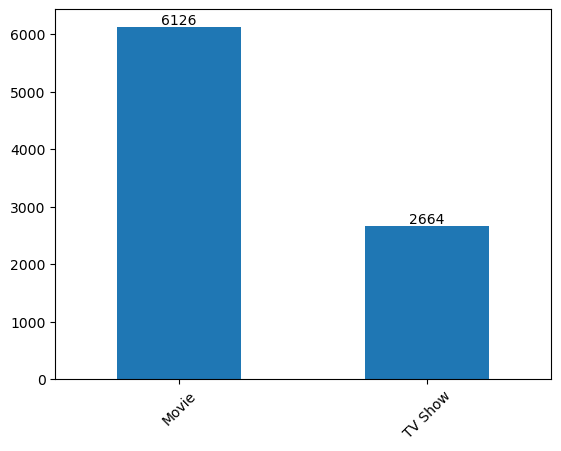

In [5]:
ax = types.plot(kind='bar')
plt.xticks(rotation=45)
for i in ax.containers:
    ax.bar_label(i,)
plt.show()

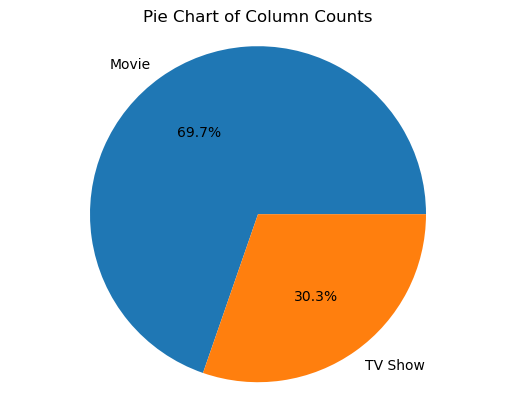

In [6]:
counts = data['type'].value_counts()
plt.pie(counts, labels=counts.index, autopct='%1.1f%%')
plt.axis('equal') 
plt.title('Pie Chart of Column Counts')
plt.show() 

# Directors

In [7]:
directors = data['director'].value_counts()
directors

Not Given                         2588
Rajiv Chilaka                       20
Alastair Fothergill                 18
Raúl Campos, Jan Suter              18
Suhas Kadav                         16
                                  ... 
Matt D'Avella                        1
Parthiban                            1
Scott McAboy                         1
Raymie Muzquiz, Stu Livingston       1
Mozez Singh                          1
Name: director, Length: 4528, dtype: int64

In [8]:
given_director = directors.sum()-directors.iloc[0]
given_director

6202

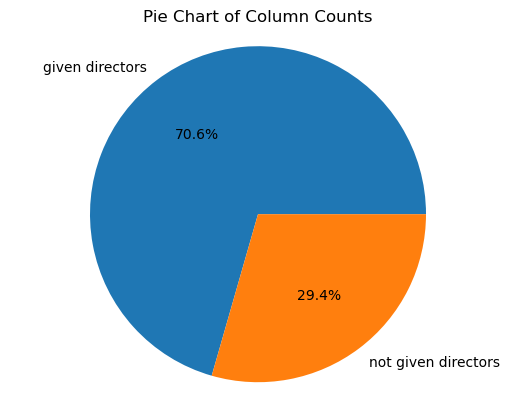

In [9]:
values = [given_director, directors.iloc[0]]
plt.pie(values, labels=['given directors','not given directors'], autopct='%1.1f%%')
plt.axis('equal') 
plt.title('Pie Chart of Column Counts')
plt.show()

## Top 10 directors

In [10]:
given_director_counts = directors[1:]
top_10_directors = given_director_counts.head(10)

In [11]:
value_names = top_10_directors.index 

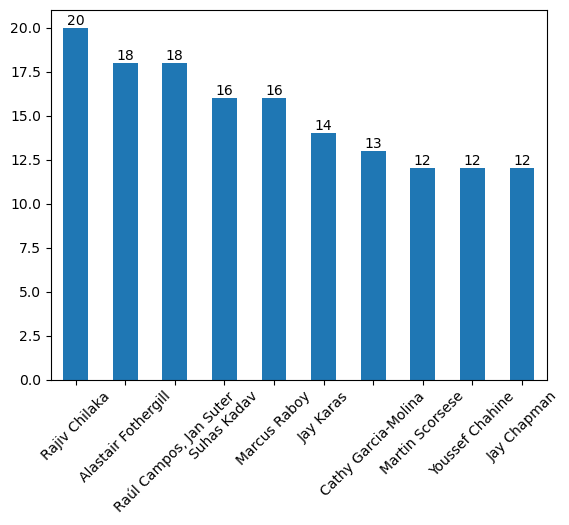

In [12]:
ax = top_10_directors.plot(kind='bar')
plt.xticks(range(len(top_10_directors)), value_names, rotation=45)
for i, v in enumerate(top_10_directors):
    ax.text(i, v, str(v), ha='center', va='bottom')
plt.show()

# Countries

In [13]:
countries = data['country'].value_counts()
countries

United States     3240
India             1057
United Kingdom     638
Pakistan           421
Not Given          287
                  ... 
Iran                 1
West Germany         1
Greece               1
Zimbabwe             1
Soviet Union         1
Name: country, Length: 86, dtype: int64

## Top 10 Countries

In [14]:
top_10_countries = countries.head(10)
top_10_countries

United States     3240
India             1057
United Kingdom     638
Pakistan           421
Not Given          287
Canada             271
Japan              259
South Korea        214
France             213
Spain              182
Name: country, dtype: int64

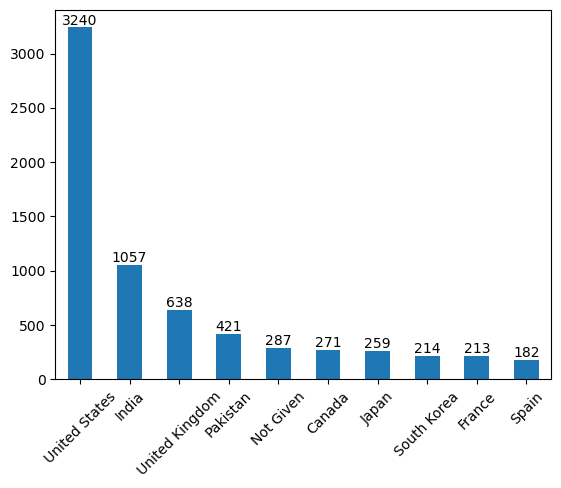

In [15]:
value_names = top_10_countries.index 
ax = top_10_countries.plot(kind='bar')
plt.xticks(range(len(top_10_countries)), value_names, rotation=45)
for i, v in enumerate(top_10_countries):
    ax.text(i, v, str(v), ha='center', va='bottom')
plt.show()

# Movies & TV-shows during time

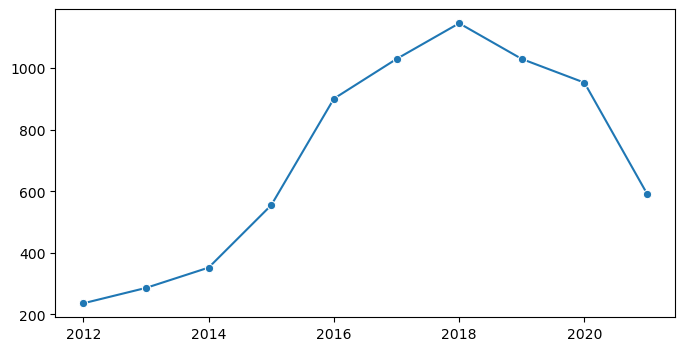

In [16]:
plt.figure(figsize = (8,4))
x = list( data['release_year'].value_counts().head(10).index)
y = list(data['release_year'].value_counts().head(10))
sns.lineplot(x = x,y=y,marker='o')
plt.show()

## Top 10 geners

In [17]:
top10geners = data['listed_in'].value_counts().head(10)
top10geners

Dramas, International Movies                        362
Documentaries                                       359
Stand-Up Comedy                                     334
Comedies, Dramas, International Movies              274
Dramas, Independent Movies, International Movies    252
Kids' TV                                            219
Children & Family Movies                            215
Children & Family Movies, Comedies                  201
Documentaries, International Movies                 186
Dramas, International Movies, Romantic Movies       180
Name: listed_in, dtype: int64

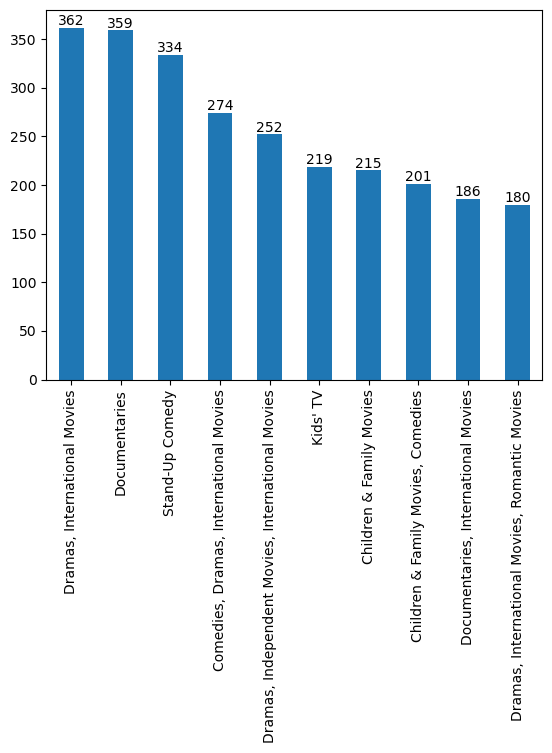

In [18]:
value_names = top10geners.index 
ax = top10geners.plot(kind='bar')
plt.xticks(range(len(top10geners)), value_names, rotation=90)
for i, v in enumerate(top10geners):
    ax.text(i, v, str(v), ha='center', va='bottom')
plt.show()

## Top Geners in every last 10 years

In [19]:
group_df = data.groupby(['release_year','listed_in']).size().reset_index(name = 'Count')
group_df

,release_year,listed_in,Count
0,1925,TV Shows,1
1,1942,"Classic Movies, Documentaries",2
2,1943,"Classic Movies, Documentaries",1
3,1943,Documentaries,2
4,1944,"Classic Movies, Documentaries",3
...,...,...,...
2796,2021,"TV Dramas, TV Sci-Fi & Fantasy",1
2797,2021,"TV Dramas, Teen TV Shows",1
2798,2021,"TV Horror, Teen TV Shows",1
2799,2021,TV Shows,2


In [20]:
top_genre= group_df.groupby('release_year')['Count'].idxmax()
top_genre_count = group_df.loc[top_genre]
top_genre_count

,release_year,listed_in,Count
0,1925,TV Shows,1
1,1942,"Classic Movies, Documentaries",2
3,1943,Documentaries,2
4,1944,"Classic Movies, Documentaries",3
5,1945,"Classic Movies, Documentaries",3
...,...,...,...
1846,2017,Documentaries,89
2179,2018,Stand-Up Comedy,58
2400,2019,Stand-Up Comedy,48
2537,2020,"Dramas, International Movies",42


In [21]:
mask = top_genre_count['release_year']>=2012
masked_data = top_genre_count[mask]
masked_data

,release_year,listed_in,Count
1183,2012,Stand-Up Comedy,12
1207,2013,Children & Family Movies,19
1329,2014,"Comedies, Dramas, International Movies",16
1499,2015,"Dramas, International Movies",30
1658,2016,Documentaries,67
1846,2017,Documentaries,89
2179,2018,Stand-Up Comedy,58
2400,2019,Stand-Up Comedy,48
2537,2020,"Dramas, International Movies",42
2765,2021,Kids' TV,24


In [22]:
pivot_table = masked_data.pivot(index='release_year', columns='listed_in', values='Count').fillna(0)

In [23]:
pivot_table

listed_in,Children & Family Movies,"Comedies, Dramas, International Movies",Documentaries,"Dramas, International Movies",Kids' TV,Stand-Up Comedy
release_year,,,,,,
2012,0.0,0.0,0.0,0.0,0.0,12.0
2013,19.0,0.0,0.0,0.0,0.0,0.0
2014,0.0,16.0,0.0,0.0,0.0,0.0
2015,0.0,0.0,0.0,30.0,0.0,0.0
2016,0.0,0.0,67.0,0.0,0.0,0.0
2017,0.0,0.0,89.0,0.0,0.0,0.0
2018,0.0,0.0,0.0,0.0,0.0,58.0
2019,0.0,0.0,0.0,0.0,0.0,48.0
2020,0.0,0.0,0.0,42.0,0.0,0.0


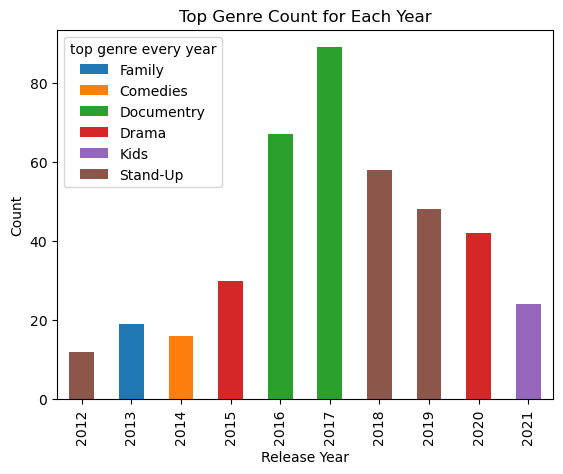

In [24]:
pivot_table.plot(kind='bar', stacked=True)
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.title('Top Genre Count for Each Year')
legend_labels=['Family', 'Comedies','Documentry','Drama','Kids','Stand-Up']
plt.legend(legend_labels,title='top genre every year', loc='upper left')
plt.show()